# Tests

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Путь к вашей папке с данными
data_dir = "D:/diplom_baza"

# Размер изображений
img_size = (400, 400)

# Подготовка данных с использованием ImageDataGenerator
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = data_generator.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42  # Добавляем seed для воспроизводимости
)

validation_generator = data_generator.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=42  # Добавляем seed для воспроизводимости
)

# Создание обратного вызова ModelCheckpoint для сохранения лучшей модели
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Создание обратного вызова EarlyStopping для прекращения обучения при отсутствии улучшений
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Создание модели нейронной сети
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(400, 400, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(12, activation='softmax'))  # 9 классов

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели с использованием обратных вызовов
model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    verbose=1,  # Вывод прогресса обучения
    workers=-1,  # Использует максимальное количество ядер
    use_multiprocessing=True,
    callbacks=[checkpoint, early_stopping]
)


Found 1422 images belonging to 12 classes.
Found 352 images belonging to 12 classes.
Epoch 1/20
45/45 [==============================] - ETA: 0s - loss: 4.7497 - accuracy: 0.1575 
Epoch 1: val_accuracy improved from -inf to 0.16761, saving model to best_model.h5


c:\Users\Sorra\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/45 [==============================] - 513s 11s/step - loss: 4.7497 - accuracy: 0.1575 - val_loss: 2.1790 - val_accuracy: 0.1676
Epoch 2/20
45/45 [==============================] - ETA: 0s - loss: 1.7564 - accuracy: 0.3368 
Epoch 2: val_accuracy improved from 0.16761 to 0.24148, saving model to best_model.h5
45/45 [==============================] - 478s 11s/step - loss: 1.7564 - accuracy: 0.3368 - val_loss: 1.8318 - val_accuracy: 0.2415
Epoch 3/20
45/45 [==============================] - ETA: 0s - loss: 1.2576 - accuracy: 0.5556
Epoch 3: val_accuracy improved from 0.24148 to 0.30966, saving model to best_model.h5
45/45 [==============================] - 474s 11s/step - loss: 1.2576 - accuracy: 0.5556 - val_loss: 2.1077 - val_accuracy: 0.3097
Epoch 4/20
45/45 [==============================] - ETA: 0s - loss: 0.7398 - accuracy: 0.7475
Epoch 4: val_accuracy improved from 0.30966 to 0.36648, saving model to best_model.h5
45/45 [==============================] - 474s 11s/step - loss: 0.7

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint

# Путь к вашей папке с данными
data_dir = "D:/diplom_baza"

# Размер изображений
img_size = (400, 400)

# Подготовка данных с использованием ImageDataGenerator
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = data_generator.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42  # Добавляем seed для воспроизводимости
)

validation_generator = data_generator.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=42  # Добавляем seed для воспроизводимости
)

# Создание обратного вызова ModelCheckpoint для сохранения лучшей модели
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Создание модели нейронной сети с добавлением Dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(400, 400, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Добавляем Dropout
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Добавляем Dropout
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Добавляем Dropout
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  # Добавляем Dropout
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(12, activation='softmax'))  # 12 классов

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели с использованием обратного вызова ModelCheckpoint
model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    verbose=1,  # Вывод прогресса обучения
    workers=-1,  # Использует максимальное количество ядер
    use_multiprocessing=True,
    callbacks=[checkpoint]
)


Found 1422 images belonging to 12 classes.
Found 352 images belonging to 12 classes.
Epoch 1/20
45/45 [==============================] - ETA: 0s - loss: 3.0347 - accuracy: 0.1034
Epoch 1: val_accuracy improved from -inf to 0.17614, saving model to best_model.h5


c:\Users\Sorra\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/45 [==============================] - 122s 3s/step - loss: 3.0347 - accuracy: 0.1034 - val_loss: 2.2994 - val_accuracy: 0.1761
Epoch 2/20
45/45 [==============================] - ETA: 0s - loss: 2.0345 - accuracy: 0.2194
Epoch 2: val_accuracy improved from 0.17614 to 0.23295, saving model to best_model.h5
45/45 [==============================] - 114s 3s/step - loss: 2.0345 - accuracy: 0.2194 - val_loss: 2.0737 - val_accuracy: 0.2330
Epoch 3/20
45/45 [==============================] - ETA: 0s - loss: 1.8054 - accuracy: 0.3207
Epoch 3: val_accuracy did not improve from 0.23295
45/45 [==============================] - 110s 2s/step - loss: 1.8054 - accuracy: 0.3207 - val_loss: 1.9566 - val_accuracy: 0.2017
Epoch 4/20
45/45 [==============================] - ETA: 0s - loss: 1.6071 - accuracy: 0.3973
Epoch 4: val_accuracy improved from 0.23295 to 0.26136, saving model to best_model.h5
45/45 [==============================] - 109s 2s/step - loss: 1.6071 - accuracy: 0.3973 - val_loss: 1.937

In [7]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Загрузка обученной модели
model = load_model("best_model.h5")  # Замените "berry_classifier_model.h5" на путь к вашей модели

# Путь к новому изображению, которое вы хотите классифицировать
new_image_path = "1.jpg"

# Загрузка изображения и изменение размера
img = image.load_img(new_image_path, target_size=(400, 400))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Нормализация и предсказание вероятностей для каждого класса
img_array /= 255.0
predictions = model.predict(img_array)

# Получение наименования класса
class_indices = train_generator.class_indices  # train_generator был определен при обучении модели
predicted_class = list(class_indices.keys())[np.argmax(predictions)]

# Вывод предсказанного класса и вероятностей для каждого класса
print(f"Predicted class: {predicted_class}")
print("Probabilities:")
for class_name, probability in zip(class_indices.keys(), predictions[0]):
    print(f"{class_name}: {probability:.4f}")


1/1 [==============================] - 0s 92ms/step
Predicted class: klukva
Probabilities:
barbaris: 0.0004
boyaroshnik: 0.0000
brusnika: 0.0000
chernika: 0.0000
gimolost: 0.0000
golubika: 0.0000
klukva: 0.9995
krushina: 0.0000
malina: 0.0000
ryabina: 0.0000
ryabina_cherno: 0.0000
zemlenika: 0.0000


In [1]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Путь к папке с данными
data_dir = '/путь/к/папке/с/изображениями/'

# Определение количества классов на основе подпапок
num_classes = len(os.listdir(data_dir))

# Параметры нейронной сети
input_shape = (400, 400, 3)  # Пример разрешения 150x150 для изображений

# Создание модели
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Создание генераторов данных
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)  # 20% для проверочных данных

target_size = (input_shape[0], input_shape[1])

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Обучение модели
history = model.fit(train_generator,
                    epochs=10,  # Указать необходимое количество эпох
                    validation_data=validation_generator)

# Визуализация графика обучения
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [1]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Путь к папке с данными
data_dir = 'D:\diplom_baza\\aug_baza'

# Определение количества классов на основе подпапок
num_classes = len(os.listdir(data_dir))

# Параметры нейронной сети
input_shape = (400, 400, 3)  # Пример разрешения 150x150 для изображений

# Создание модели
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Создание генераторов данных
batch_size = 32

# Используем ImageDataGenerator с параметром validation_split для разделения данных
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

# Обучающая выборка (80%)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Проверочная выборка (10%)
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Тестовая выборка (10%)
test_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # Используем subset='validation' для создания тестовой выборки
    shuffle=False  # Чтобы тестовая выборка не перемешивалась
)

# Обучение модели
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

# Оценка модели на тестовой выборке
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Визуализация графика обучения
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


Found 31517 images belonging to 46 classes.
Found 7860 images belonging to 46 classes.
Found 7860 images belonging to 46 classes.
Epoch 1/10
985/985 [==============================] - 1498s 2s/step - loss: 3.0977 - accuracy: 0.1682 - val_loss: 2.3909 - val_accuracy: 0.3177
Epoch 2/10
 71/985 [=>............................] - ETA: 17:12 - loss: 2.0305 - accuracy: 0.4159

KeyboardInterrupt: 

In [3]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Путь к вашей папке с данными
data_dir = 'D:\\diplom_baza\\aug_baza'

# Получаем список всех изображений в директории
all_images = [os.path.join(root, file) for root, dirs, files in os.walk(data_dir) for file in files]

# Разделяем данные на обучающую и тестовую выборки
train_images, test_images = train_test_split(all_images, test_size=0.1, random_state=42)

# Разделяем обучающие данные на обучающую и валидационную выборки
train_images, val_images = train_test_split(train_images, test_size=0.1, random_state=42)

# Выводим информацию о количестве изображений в каждой выборке
print(f"Всего изображений: {len(all_images)}")
print(f"Обучающая выборка: {len(train_images)} изображений")
print(f"Валидационная выборка: {len(val_images)} изображений")
print(f"Тестовая выборка: {len(test_images)} изображений")

# Создаем DataFrame для использования с flow_from_dataframe
train_df = pd.DataFrame({'filename': train_images, 'class': [os.path.basename(os.path.dirname(img)) for img in train_images]})
val_df = pd.DataFrame({'filename': val_images, 'class': [os.path.basename(os.path.dirname(img)) for img in val_images]})
test_df = pd.DataFrame({'filename': test_images, 'class': [os.path.basename(os.path.dirname(img)) for img in test_images]})

# Создаем генераторы данных для обучения, валидации и тестирования
image_size = (224, 224)
batch_size = 32

# Создаем генератор данных с параметром `validate_filenames=False`
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    validate_filenames=False  # Опция, чтобы проигнорировать предупреждения о недопустимых именах файлов
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='filename',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    validate_filenames=False
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    validate_filenames=False
)

# Создаем сверточную нейронную сеть
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Компилируем модель
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучаем модель
epochs = 10
model.fit(train_generator, epochs=epochs, validation_data=val_generator)

# Оцениваем модель на тестовых данных
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss}")


Всего изображений: 39760
Обучающая выборка: 32205 изображений
Валидационная выборка: 3579 изображений
Тестовая выборка: 3976 изображений
Found 32205 non-validated image filenames belonging to 46 classes.
Found 3579 non-validated image filenames belonging to 46 classes.
Found 3976 non-validated image filenames belonging to 46 classes.
Epoch 1/10
  11/1007 [..............................] - ETA: 18:38 - loss: 4.0434 - accuracy: 0.0114

KeyboardInterrupt: 

# 1.2

Всего изображений: 39760
Обучающая выборка: 32205 изображений
Валидационная выборка: 3579 изображений
Тестовая выборка: 3976 изображений
Found 32205 non-validated image filenames belonging to 46 classes.
Found 3579 non-validated image filenames belonging to 46 classes.
Found 3976 non-validated image filenames belonging to 46 classes.
Epoch 1/10
1007/1007 [==============================] - ETA: 0s - loss: 3.0185 - accuracy: 0.1789
Epoch 1: val_accuracy improved from -inf to 0.37245, saving model to best_model.h5
1007/1007 [==============================] - 1286s 1s/step - loss: 3.0185 - accuracy: 0.1789 - val_loss: 2.2046 - val_accuracy: 0.3725
Epoch 2/10
1007/1007 [==============================] - ETA: 0s - loss: 1.6856 - accuracy: 0.5068
Epoch 2: val_accuracy improved from 0.37245 to 0.51048, saving model to best_model.h5
1007/1007 [==============================] - 1224s 1s/step - loss: 1.6856 - accuracy: 0.5068 - val_loss: 1.6675 - val_accuracy: 0.5105
Epoch 3/10
1007/1007 [=======

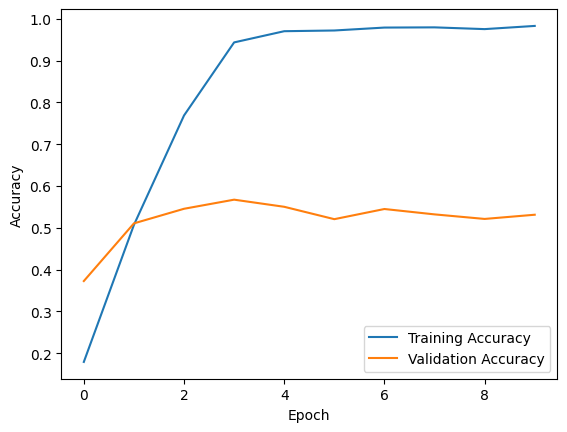

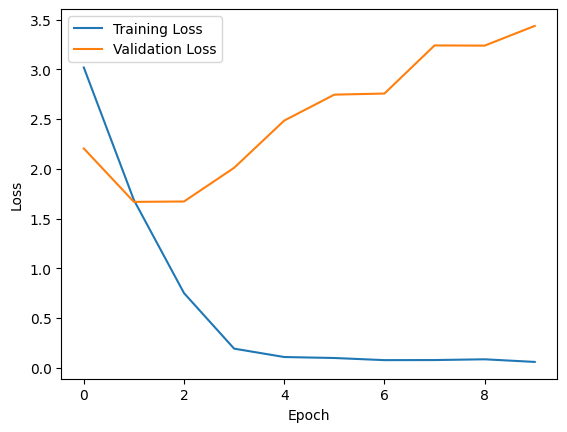

125/125 [==============================] - 146s 1s/step - loss: 2.0472 - accuracy: 0.5651
Точность на тестовых данных: 0.5651408433914185
Потери на тестовых данных: 2.047213315963745


In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Путь к вашей папке с данными
data_dir = 'D:\\diplom_baza\\aug_baza'

# Получаем список всех изображений в директории
all_images = [os.path.join(root, file) for root, dirs, files in os.walk(data_dir) for file in files]

# Разделяем данные на обучающую и тестовую выборки
train_images, test_images = train_test_split(all_images, test_size=0.1, random_state=42)

# Разделяем обучающие данные на обучающую и валидационную выборки
train_images, val_images = train_test_split(train_images, test_size=0.1, random_state=42)

# Выводим информацию о количестве изображений в каждой выборке
print(f"Всего изображений: {len(all_images)}")
print(f"Обучающая выборка: {len(train_images)} изображений")
print(f"Валидационная выборка: {len(val_images)} изображений")
print(f"Тестовая выборка: {len(test_images)} изображений")

# Создаем DataFrame для использования с flow_from_dataframe
train_df = pd.DataFrame({'filename': train_images, 'class': [os.path.basename(os.path.dirname(img)) for img in train_images]})
val_df = pd.DataFrame({'filename': val_images, 'class': [os.path.basename(os.path.dirname(img)) for img in val_images]})
test_df = pd.DataFrame({'filename': test_images, 'class': [os.path.basename(os.path.dirname(img)) for img in test_images]})

# Создаем генераторы данных для обучения, валидации и тестирования
image_size = (224, 224)
batch_size = 32

# Создаем генератор данных с параметром `validate_filenames=False`
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    validate_filenames=False  # Опция, чтобы проигнорировать предупреждения о недопустимых именах файлов
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='filename',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    validate_filenames=False
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    validate_filenames=False
)

# Создаем модель
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Создаем callback для сохранения весов
checkpoint_filepath = 'best_model.h5'
model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

# Обучение модели с использованием callback
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[model_checkpoint]
)

# График точности
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# График потерь
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Загрузите лучшие веса модели
model.load_weights(checkpoint_filepath)

# Оцените модель на тестовых данных
test_loss, test_accuracy = model.evaluate(test_generator)

# Выведите результаты
print(f"Точность на тестовых данных: {test_accuracy}")
print(f"Потери на тестовых данных: {test_loss}")


# 1

Всего изображений: 39760
Обучающая выборка: 32205 изображений
Валидационная выборка: 3579 изображений
Тестовая выборка: 3976 изображений
Found 32205 non-validated image filenames belonging to 46 classes.
Found 3579 non-validated image filenames belonging to 46 classes.
Found 3976 non-validated image filenames belonging to 46 classes.
Epoch 1/10
1007/1007 [==============================] - ETA: 0s - loss: 2.8099 - accuracy: 0.2176
Epoch 1: val_accuracy improved from -inf to 0.35848, saving model to best_model.h5
1007/1007 [==============================] - 1265s 1s/step - loss: 2.8099 - accuracy: 0.2176 - val_loss: 2.2371 - val_accuracy: 0.3585
Epoch 2/10
1007/1007 [==============================] - ETA: 0s - loss: 1.7739 - accuracy: 0.4759
Epoch 2: val_accuracy improved from 0.35848 to 0.46633, saving model to best_model.h5
1007/1007 [==============================] - 1227s 1s/step - loss: 1.7739 - accuracy: 0.4759 - val_loss: 1.7888 - val_accuracy: 0.4663
Epoch 3/10
1007/1007 [=======

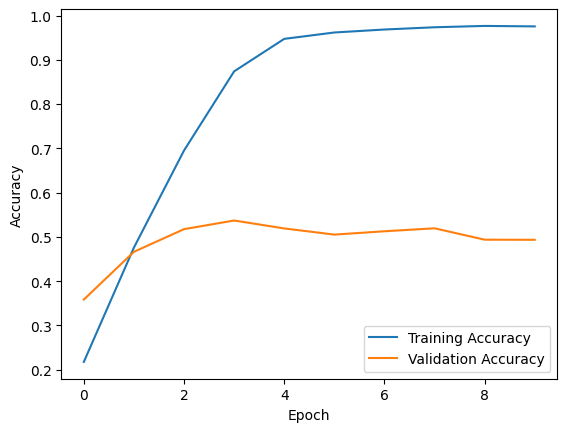

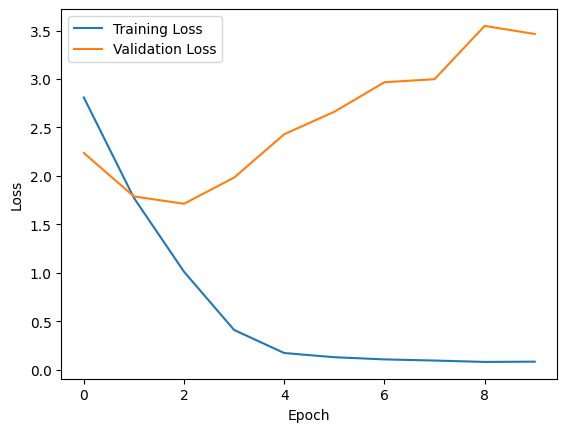

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Путь к вашей папке с данными
data_dir = 'D:\\diplom_baza\\aug_baza'

# Получаем список всех изображений в директории
all_images = [os.path.join(root, file) for root, dirs, files in os.walk(data_dir) for file in files]

# Разделяем данные на обучающую и тестовую выборки
train_images, test_images = train_test_split(all_images, test_size=0.1, random_state=42)

# Разделяем обучающие данные на обучающую и валидационную выборки
train_images, val_images = train_test_split(train_images, test_size=0.1, random_state=42)

# Выводим информацию о количестве изображений в каждой выборке
print(f"Всего изображений: {len(all_images)}")
print(f"Обучающая выборка: {len(train_images)} изображений")
print(f"Валидационная выборка: {len(val_images)} изображений")
print(f"Тестовая выборка: {len(test_images)} изображений")

# Создаем DataFrame для использования с flow_from_dataframe
train_df = pd.DataFrame({'filename': train_images, 'class': [os.path.basename(os.path.dirname(img)) for img in train_images]})
val_df = pd.DataFrame({'filename': val_images, 'class': [os.path.basename(os.path.dirname(img)) for img in val_images]})
test_df = pd.DataFrame({'filename': test_images, 'class': [os.path.basename(os.path.dirname(img)) for img in test_images]})

# Создаем генераторы данных для обучения, валидации и тестирования
image_size = (224, 224)
batch_size = 32

# Создаем генератор данных с параметром `validate_filenames=False`
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    validate_filenames=False  # Опция, чтобы проигнорировать предупреждения о недопустимых именах файлов
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='filename',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    validate_filenames=False
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    validate_filenames=False
)

# Создаем модель
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Создаем callback для сохранения весов
checkpoint_filepath = 'best_model.h5'
model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

# Обучение модели с использованием callback
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[model_checkpoint]
)

# График точности
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# График потерь
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 1.1

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Путь к вашей папке с данными
data_dir = 'D:\\diplom_baza\\aug_baza'

# Получаем список всех изображений в директории
all_images = [os.path.join(root, file) for root, dirs, files in os.walk(data_dir) for file in files]

# Разделяем данные на обучающую и тестовую выборки
train_images, test_images = train_test_split(all_images, test_size=0.1, random_state=42)

# Разделяем обучающие данные на обучающую и валидационную выборки
train_images, val_images = train_test_split(train_images, test_size=0.1, random_state=42)

# Выводим информацию о количестве изображений в каждой выборке
print(f"Всего изображений: {len(all_images)}")
print(f"Обучающая выборка: {len(train_images)} изображений")
print(f"Валидационная выборка: {len(val_images)} изображений")
print(f"Тестовая выборка: {len(test_images)} изображений")

# Создаем DataFrame для использования с flow_from_dataframe
train_df = pd.DataFrame({'filename': train_images, 'class': [os.path.basename(os.path.dirname(img)) for img in train_images]})
val_df = pd.DataFrame({'filename': val_images, 'class': [os.path.basename(os.path.dirname(img)) for img in val_images]})
test_df = pd.DataFrame({'filename': test_images, 'class': [os.path.basename(os.path.dirname(img)) for img in test_images]})

# Создаем генераторы данных для обучения, валидации и тестирования
image_size = (224, 224)
batch_size = 32

# Создаем генератор данных с параметром `validate_filenames=False`
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    validate_filenames=False  # Опция, чтобы проигнорировать предупреждения о недопустимых именах файлов
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='filename',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    validate_filenames=False
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    validate_filenames=False
)

# Создаем модель
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Создаем callback для сохранения весов
checkpoint_filepath = 'best_model.h5'
model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

# Обучение модели с использованием callback
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[model_checkpoint]
)

# График точности
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# График потерь
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Всего изображений: 39760
Обучающая выборка: 32205 изображений
Валидационная выборка: 3579 изображений
Тестовая выборка: 3976 изображений
Found 32205 non-validated image filenames belonging to 46 classes.
Found 3579 non-validated image filenames belonging to 46 classes.
Found 3976 non-validated image filenames belonging to 46 classes.
Epoch 1/30
1007/1007 [==============================] - ETA: 0s - loss: 3.2570 - accuracy: 0.1243
Epoch 1: val_accuracy improved from -inf to 0.23750, saving model to best_model.h5
1007/1007 [==============================] - 1258s 1s/step - loss: 3.2570 - accuracy: 0.1243 - val_loss: 2.6023 - val_accuracy: 0.2375
Epoch 2/30
1007/1007 [==============================] - ETA: 0s - loss: 2.1060 - accuracy: 0.3891
Epoch 2: val_accuracy improved from 0.23750 to 0.42051, saving model to best_model.h5
1007/1007 [==============================] - 1228s 1s/step - loss: 2.1060 - accuracy: 0.3891 - val_loss: 1.9820 - val_accuracy: 0.4205
Epoch 3/30
1007/1007 [=======

KeyboardInterrupt: 

# 2

In [9]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Путь к вашей папке с данными
data_dir = 'D:\\diplom_baza\\aug_baza'

# Получаем список всех изображений в директории
all_images = [os.path.join(root, file) for root, dirs, files in os.walk(data_dir) for file in files]

# Разделяем данные на обучающую и тестовую выборки
train_images, test_images = train_test_split(all_images, test_size=0.1, random_state=42)

# Разделяем обучающие данные на обучающую и валидационную выборки
train_images, val_images = train_test_split(train_images, test_size=0.1, random_state=42)

# Выводим информацию о количестве изображений в каждой выборке
print(f"Всего изображений: {len(all_images)}")
print(f"Обучающая выборка: {len(train_images)} изображений")
print(f"Валидационная выборка: {len(val_images)} изображений")
print(f"Тестовая выборка: {len(test_images)} изображений")

# Создаем DataFrame для использования с flow_from_dataframe
train_df = pd.DataFrame({'filename': train_images, 'class': [os.path.basename(os.path.dirname(img)) for img in train_images]})
val_df = pd.DataFrame({'filename': val_images, 'class': [os.path.basename(os.path.dirname(img)) for img in val_images]})
test_df = pd.DataFrame({'filename': test_images, 'class': [os.path.basename(os.path.dirname(img)) for img in test_images]})

# Создаем генераторы данных для обучения, валидации и тестирования
image_size = (600, 600)
batch_size = 32

# Создаем генератор данных с параметром `validate_filenames=False`
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    validate_filenames=False  # Опция, чтобы проигнорировать предупреждения о недопустимых именах файлов
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='filename',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    validate_filenames=False
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    validate_filenames=False
)

# Создаем модель
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(600, 600, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Создаем callback для сохранения весов
checkpoint_filepath = 'best_model.h5'
model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

# Обучение модели с использованием callback
history = model.fit(
    train_generator,
    epochs=40,
    validation_data=val_generator,
    callbacks=[model_checkpoint]
)

# График точности
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# График потерь
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Всего изображений: 39760
Обучающая выборка: 32205 изображений
Валидационная выборка: 3579 изображений
Тестовая выборка: 3976 изображений
Found 32205 non-validated image filenames belonging to 46 classes.
Found 3579 non-validated image filenames belonging to 46 classes.
Found 3976 non-validated image filenames belonging to 46 classes.
Epoch 1/40
1007/1007 [==============================] - ETA: 0s - loss: 4.0942 - accuracy: 0.0221
Epoch 1: val_accuracy improved from -inf to 0.02319, saving model to best_model.h5
1007/1007 [==============================] - 1388s 1s/step - loss: 4.0942 - accuracy: 0.0221 - val_loss: 3.8230 - val_accuracy: 0.0232
Epoch 2/40
1007/1007 [==============================] - ETA: 0s - loss: 3.8230 - accuracy: 0.0221
Epoch 2: val_accuracy did not improve from 0.02319
1007/1007 [==============================] - 1390s 1s/step - loss: 3.8230 - accuracy: 0.0221 - val_loss: 3.8215 - val_accuracy: 0.0232
Epoch 3/40
1007/1007 [==============================] - ETA: 0s 

UnknownError: Graph execution error:

2 root error(s) found.
  (0) UNKNOWN:  OSError: unrecognized data stream contents when reading image file
Traceback (most recent call last):

  File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\tensorflow\python\ops\script_ops.py", line 271, in __call__
    ret = func(*args)

  File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1004, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\engine\data_adapter.py", line 830, in wrapped_generator
    for data in generator_fn():

  File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\engine\data_adapter.py", line 956, in generator_fn
    yield x[i]

  File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras_preprocessing\image\iterator.py", line 65, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras_preprocessing\image\iterator.py", line 227, in _get_batches_of_transformed_samples
    img = load_img(filepaths[j],

  File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras_preprocessing\image\utils.py", line 138, in load_img
    img = img.resize(width_height_tuple, resample)

  File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\PIL\Image.py", line 2164, in resize
    self.load()

  File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\PIL\ImageFile.py", line 310, in load
    raise _get_oserror(err_code, encoder=False)

OSError: unrecognized data stream contents when reading image file


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
	 [[categorical_crossentropy/softmax_cross_entropy_with_logits/Shape_2/_10]]
  (1) UNKNOWN:  OSError: unrecognized data stream contents when reading image file
Traceback (most recent call last):

  File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\tensorflow\python\ops\script_ops.py", line 271, in __call__
    ret = func(*args)

  File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1004, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\engine\data_adapter.py", line 830, in wrapped_generator
    for data in generator_fn():

  File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\engine\data_adapter.py", line 956, in generator_fn
    yield x[i]

  File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras_preprocessing\image\iterator.py", line 65, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras_preprocessing\image\iterator.py", line 227, in _get_batches_of_transformed_samples
    img = load_img(filepaths[j],

  File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras_preprocessing\image\utils.py", line 138, in load_img
    img = img.resize(width_height_tuple, resample)

  File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\PIL\Image.py", line 2164, in resize
    self.load()

  File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\PIL\ImageFile.py", line 310, in load
    raise _get_oserror(err_code, encoder=False)

OSError: unrecognized data stream contents when reading image file


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_15726]